# Example 2 (Synthetic data via Gibbs sampling)

In this tutorial, we will demonstrate the basic use of BurstLink using simulated data generated by the genetic toggle switch dynamic model. In this example, we set up a situation in which two genes regulate each other with the same positive regulation types.

<img src="../../_static/image/example2.png" alt="Example2" width="280"/>

In [1]:
# Importing packages
import os, math
import numpy as np
import pandas as pd
import burstlink as bl

To run the examples, you'll need to download the some pre-existing files in `docs/tutorials/simulated_data` folder and change your working directory to the `simulated_data` folder.

In [ ]:
# setting work dictionary
os.chdir("your_path/simulated_data")

## Data preprocessing

In [5]:
simul_data = np.asarray(pd.read_csv(os.path.abspath('data/simul_data_example2.csv')))[:, 1::]
simul_data 

array([[17,  6,  4, ...,  7,  7,  5],
       [ 5,  2,  1, ...,  3, 16,  8]])

You can also generate new simulation data with `_synthetic_data` by reset parameters:

In [ ]:
params = [1, 1, 1, 1, 10, 10, 4]
simul_data = bl._utils._synthetic_data.gibbs_sample(params, 1000, 2000)

## Inference procedure

Import the synthetic scRNA-seq data and obatin the inference results, including (1) regulatory interactions: regulation types, regulation strengths, and regulation visualization; and (2) transcriptional bursting: burst frequencies, burst sizes, and expression variabilities.

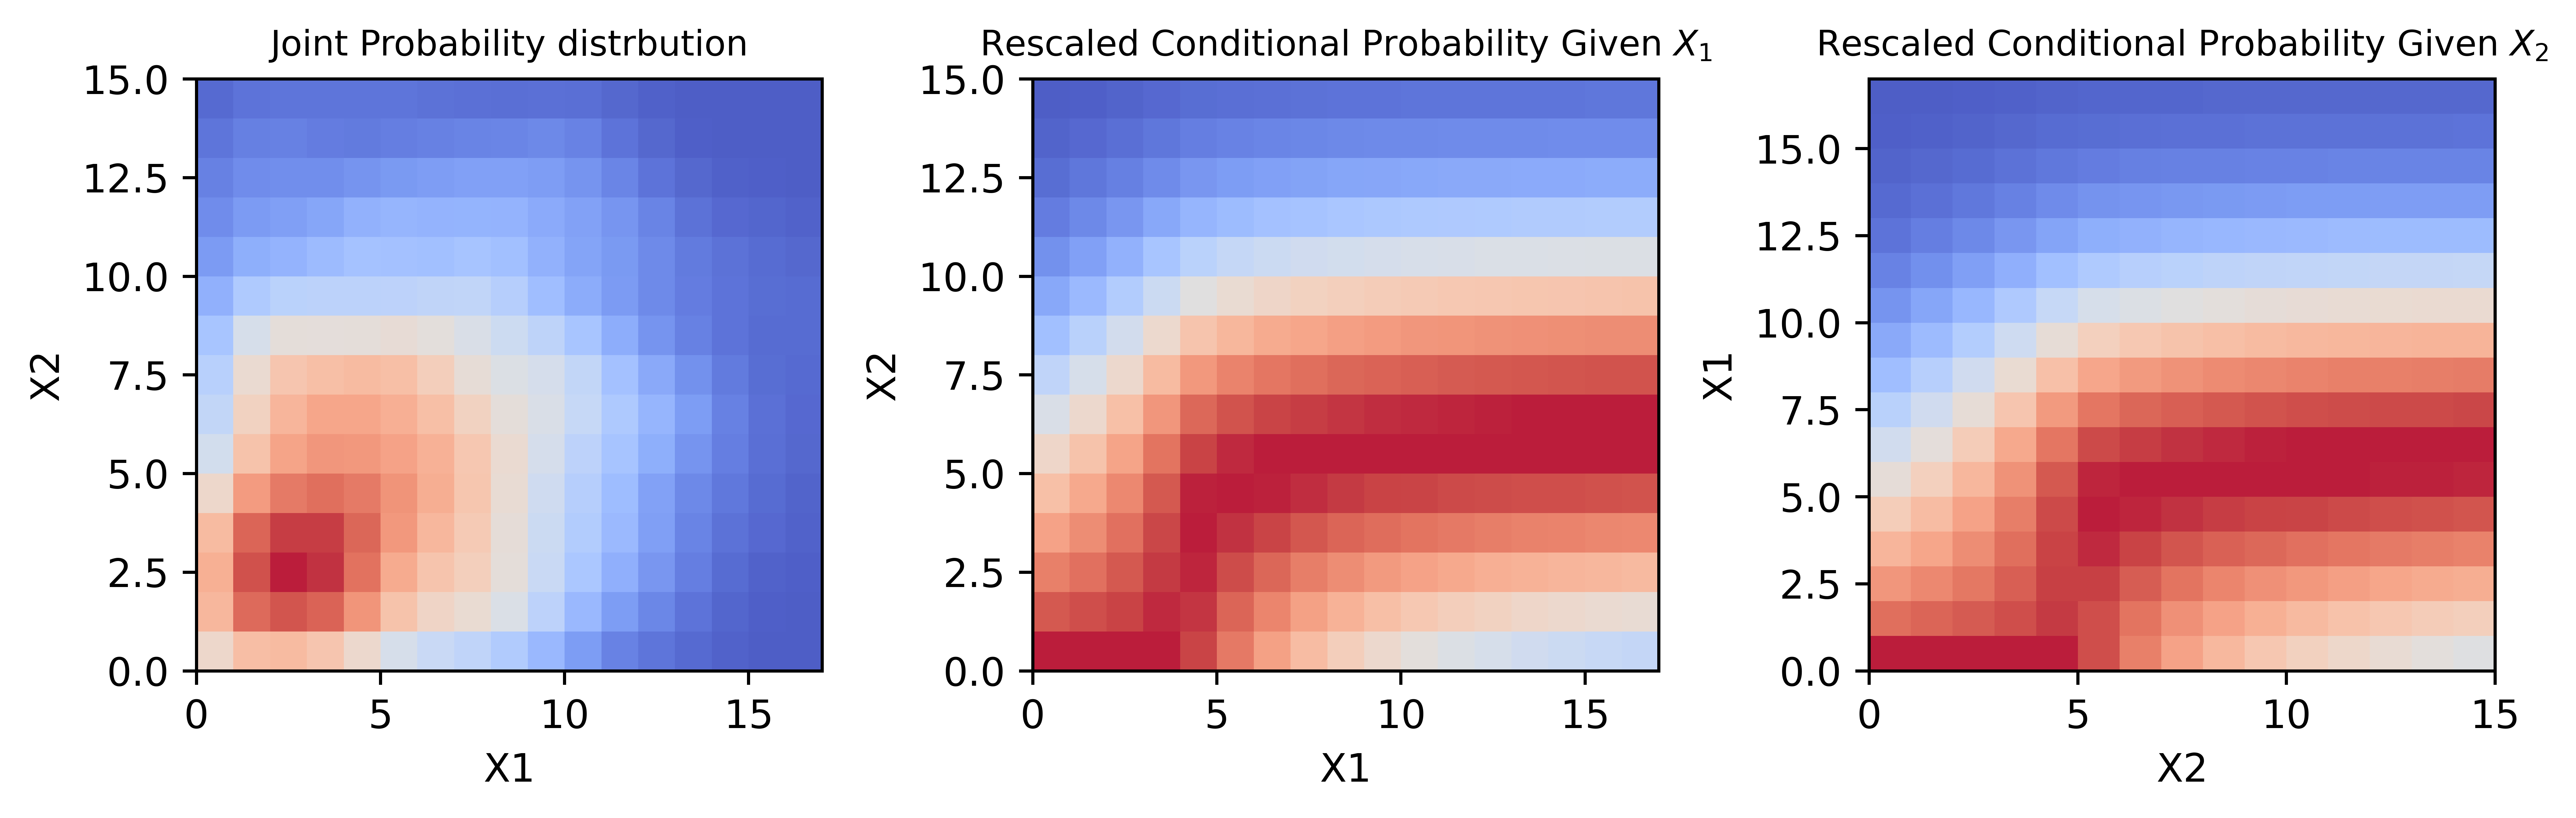

array([ 0.95491529,  1.00278742,  0.88201944,  0.8683852 ,  9.56089875,
        9.08886634,  3.2795636 ,  0.45851049,  0.4653797 , 10.83978236,
       10.46639935,  0.52446349,  0.50394336,  1.        ,  0.17451829,
        0.05371003,  5.05498809,  4.51918347,  1.        ,  1.        ])

In [ ]:
params = [1, 1, 1, 1, 10, 10, 4]
geneinfo = np.array(['X1', 'X2', math.copysign(1, params[-1]), math.copysign(1, params[-1])]).reshape([1, 4])
bl.tools._burst_interactions.genepair_inference(simul_data, geneinfo, figflag = 1, verbose1 = True, verbose2 = False, verbose3 = 2, test = False)